# Regression

In [1]:
filename = 'data/airfoil_self_noise.dat'

### Attribute Information:

This problem has the following inputs:
1. Frequency, in Hertzs.
2. Angle of attack, in degrees.
3. Chord length, in meters.
4. Free-stream velocity, in meters per second.
5. Suction side displacement thickness, in meters.

The only output is: <br>
6. Scaled sound pressure level, in decibels.

In [2]:
import numpy as np
import pandas as pd

In [3]:
names = [
    'Frequency', 
    'Angle', 
    'Chord length', 
    'velocity', 
    'thickness',
    'Sound Pressure'
]
data = pd.read_csv(filename, sep='\t', header=None,  names=names)

In [4]:
data.head()

,Frequency,Angle,Chord length,velocity,thickness,Sound Pressure
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [5]:
X = data.iloc[:, 0:-1].values

In [6]:
X

array([[8.00000e+02, 0.00000e+00, 3.04800e-01, 7.13000e+01, 2.66337e-03],
       [1.00000e+03, 0.00000e+00, 3.04800e-01, 7.13000e+01, 2.66337e-03],
       [1.25000e+03, 0.00000e+00, 3.04800e-01, 7.13000e+01, 2.66337e-03],
       ...,
       [4.00000e+03, 1.56000e+01, 1.01600e-01, 3.96000e+01, 5.28487e-02],
       [5.00000e+03, 1.56000e+01, 1.01600e-01, 3.96000e+01, 5.28487e-02],
       [6.30000e+03, 1.56000e+01, 1.01600e-01, 3.96000e+01, 5.28487e-02]])

In [7]:
y = data.iloc[:, -1].values

In [8]:
X.shape

(1503, 5)

In [9]:
y.shape

(1503,)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=123)

In [12]:
X_train.shape

(1127, 5)

In [13]:
X_test.shape

(376, 5)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lr = LinearRegression()

In [16]:
lr.fit(X_train, y_train)

LinearRegression()

In [17]:
lr.coef_

array([-1.26427170e-03, -4.22774919e-01, -3.61455630e+01,  9.78783454e-02,
       -1.50416433e+02])

In [18]:
lr.intercept_

132.9653877834142

In [19]:
y_pred = lr.predict(X_test)

In [20]:
# y_test = y_test[:20]

In [21]:
# y_pred = y_pred[:20]

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

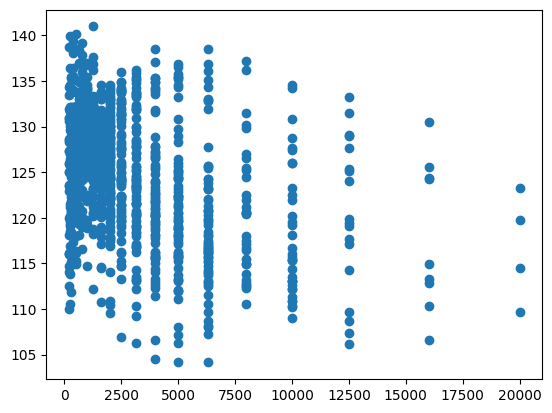

In [23]:
plt.scatter(X_train[:,0], y_train)

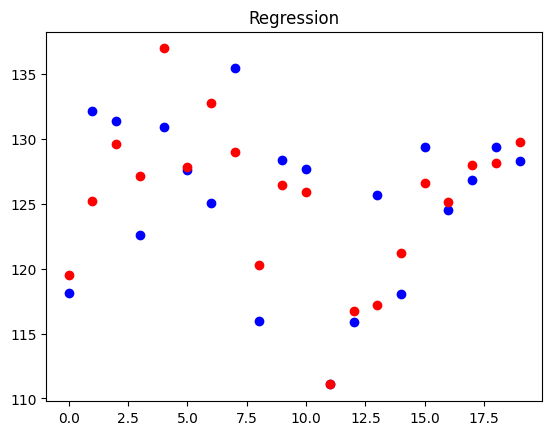

In [32]:
import numpy as np


def plotGraph(y_test,y_pred,regressorName):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.scatter(range(len(y_test)), y_test, color='blue')
    plt.scatter(range(len(y_pred)), y_pred, color='red')
    plt.title(regressorName)
    return



plotGraph(y_test[:20], y_pred[:20], "Regression")


Text(0, 0.5, 'Predicted')

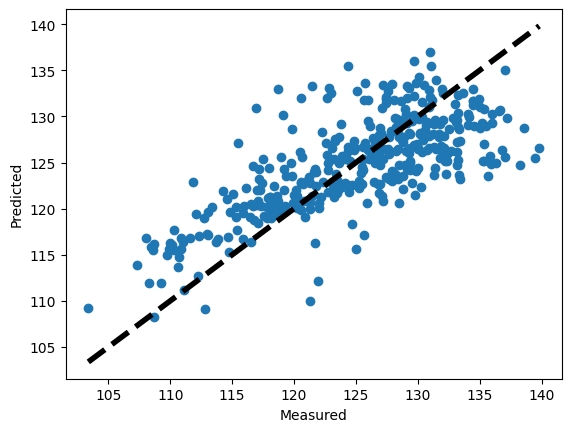

In [33]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

In [34]:
print(X_test.shape, y_test.shape)

(376, 5) (376,)
